# MoBioFP - Matching (Minutiae-based method)

## Import Python Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import fingerprint_feature_extractor as ffe

## Define Global Constants

In [2]:
DATA_DIR = "../data/processed"
PROBE_IMAGE_PATH = DATA_DIR + "/samples/1_o_1_w_1.png"
CANDIDATE_IMAGE_PATH = DATA_DIR + "/samples/1_i_1_w_1.png"

## Load fingerprint images

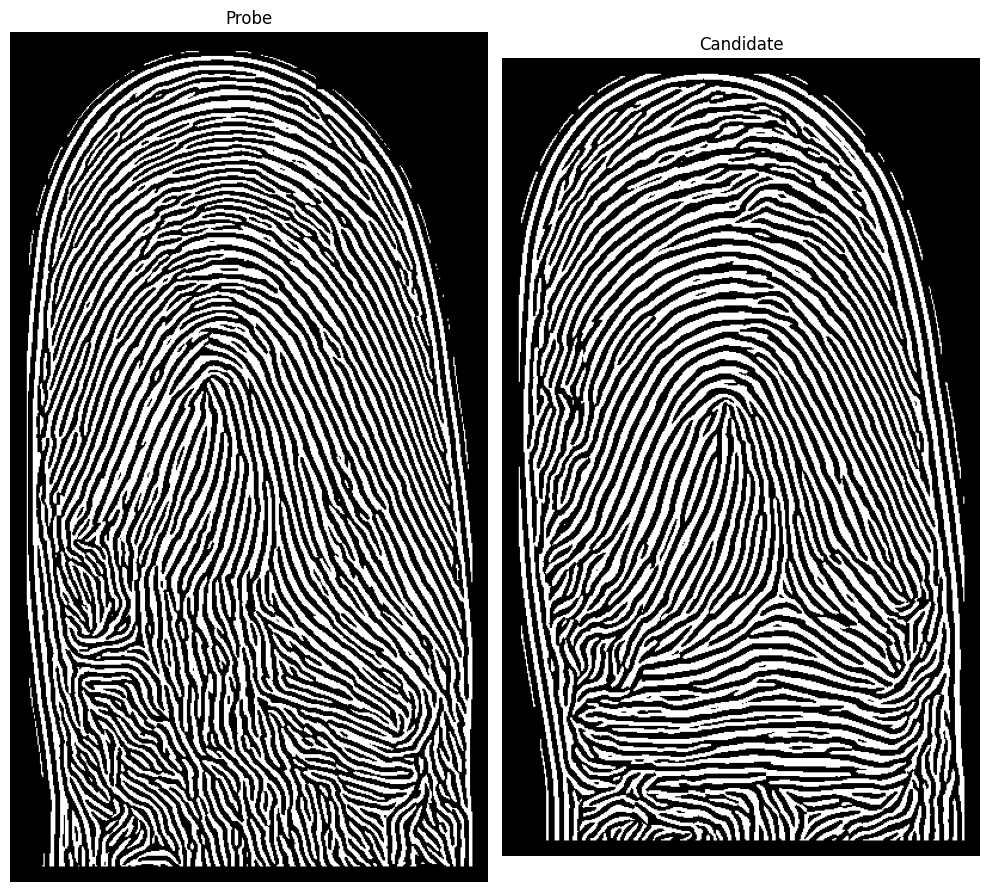

In [3]:
probe = cv2.imread(PROBE_IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
candidate = cv2.imread(CANDIDATE_IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(probe, cmap="gray")
plt.title("Probe")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(candidate, cmap="gray")
plt.title("Candidate")
plt.axis("off")
plt.tight_layout()
plt.show()

## Extract minutiae (terminations and bifurcations)

In [4]:
def extract_minutiae(image: np.ndarray, threshold: int = 10) -> dict:
    terminations, bifurcations = ffe.extract_minutiae_features(image, threshold)
    minutiae = np.array(
        [
            [
                int(minutia.locX),
                int(minutia.locY),
                float(minutia.Orientation[0]),
                minutia.Type,
            ]
            for minutia in terminations + bifurcations
        ]
    )
    result = {
        "count": len(minutiae),
        "minutiae": minutiae,
        "term": len(terminations),
        "bif": len(bifurcations),
    }

    return result


def minutiae_info(minutiae: dict) -> str:
    return f"Total: {minutiae['count']}\nTerminations: {minutiae['term']}\nBifurcations: {minutiae['bif']}"

In [5]:
probe_minutiae = extract_minutiae(probe)
candidate_minutiae = extract_minutiae(candidate)